$$
    \LARGE{Sprawozdanie \ 5}\\ \\
    Jan \ Bronicki\\ Denis \ Firat\\ Borys \ Staszczak
$$

#### 1. Wstep o rekurencyjnym algorytmie najmniejszych kwadratów, dla systemu dynamicznego
Rekurencyjny algorytm najmniejszych kwadratów(RLS) jest filtrem adaptacyjnym, którego zadaniem jest minimalizacja wartości uzyskiwanej z metody najmniejszych kwadratów. W skrócie zadaniem tego algorytmu jest poprawa parametrów regulatora zależnie od warunków w jakich się znajduje, jednocześnie ignorując zakłócenia. Filtry adaptacyjne mają to do siebie, że lepiej sprawdzają się w warunkach dynamicznych gdzie stabilna nastawa parametrów regulatora może się nie sprawdzic. Najwięciej problemów jest z dobraniem wspołczynnika zapominania, od którego zależy jak bardzo algrotym "przejmuje" się przeszłością sygnałów wejściowych.


#### 2. Badania symulacyjne

#### Importujemy potrzebne moduły

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

Matplotlib is building the font cache; this may take a moment.


#### Definiujemy potrzebne nam funckje

In [26]:
def y0(k_akt: float) -> float:
    return math.sin(0.1 * k_akt)


def obiekt(u: float, k: float, a0_ob: float, a1_ob: float) -> float:
    a0 = 1
    a1 = 1

    z = np.random.uniform(-0.05, 0.05)
    a0_ob[k] = a0
    a1_ob[k] = a1

    return a0 * u[0, 0] + a1 * u[1, 0] + z


def sterownik(u_old: float, y0: float, a: float) -> float:
    return (y0 - a[1, 0] * u_old) / a[0, 0]

#### Główna funkcja symulacji

In [27]:
def symulacja(N=1000, lamb=1, legend_location="best", plot_title=""):
    y = np.zeros(N)
    yd = np.zeros(N)
    k = np.zeros(N)
    a0 = np.zeros(N)
    a1 = np.zeros(N)
    a0_ob = np.zeros(N)
    a1_ob = np.zeros(N)

    u = np.array([[0.0], [0.0]], dtype=object)

    a = np.array([[0.1], [0.1]], dtype=object)
    P = np.array([[1000.0, 0.0], [0.0, 1000.0]], dtype=object)
    x = np.array([[0.0], [0.0]], dtype=object)
    
    # Główna pętla symulacji
    for i in range(1, N):
        k[i] = i
        yd[i] = y0(i)

        x = u
        yn = y[i - 1]

        # Estymator
        P = (1/lamb)*(P - (np.matmul(np.matmul(P, x), np.matmul(x.T, P))) / (1 + np.matmul(np.matmul(x.T, P), x)))
        a = a + np.matmul(np.matmul(P, x), (yn - np.matmul(x.T, a)))

        a0[i] = a[0, 0]
        a1[i] = a[1, 0]

        u[1, 0] = u[0, 0]
        u[0, 0] = sterownik(u[1, 0], y0(i), a)

        y[i] = obiekt(u, i, a0_ob, a1_ob)

    # Plotowanie
    fig_y, axs_y = plt.subplots()
    axs_y.plot(k, y, color="green", alpha=1, label="$y$")
    axs_y.plot(k, yd, color="black", alpha=1, label="$y_0$")
    axs_y.set_xlabel(r"$k$", fontsize=30)
    axs_y.set_xlabel(r"$y_k$", fontsize=30)
    axs_y.grid(True)
    axs_y.set_title(plot_title)
    axs_y.legend(loc=legend_location, fontsize=22, shadow=True, framealpha=0.8)

    fig_a, axs_a = plt.subplots()
    axs_a.plot(k, a0_ob, color="black", alpha=1, label="$a_0$")
    axs_a.plot(k, a1_ob, color="red", alpha=1, label="$a_1$")
    axs_a.plot(k, a0, color="green", alpha=0.8, label="$\hat{a}_0$")
    axs_a.plot(k, a1, color="orange", alpha=0.8, label="$\hat{a}_1$")
    axs_a.set_xlabel(r"$k$", fontsize=30)
    axs_a.set_xlabel(r"$y_k$", fontsize=30)
    axs_a.grid(True)
    axs_y.set_title(plot_title)
    axs_a.legend(loc=legend_location, fontsize=22, shadow=True, framealpha=0.8)

    plt.show()

#### Badania symulacyjne, dla N=1000 oraz $\lambda=1$
bla bla bla

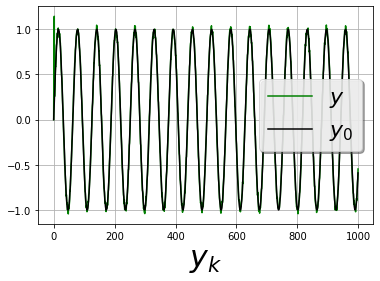

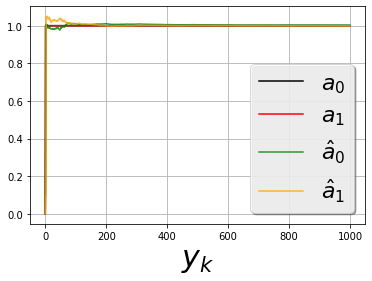

In [28]:
symulacja(N=1000, lamb=1)

## 3. Zbadanie zachowania układu, dla N=2000, a wartośćś w chwili k=1000 zmienia się z 1 na 2

#### Musimy zredefiniować funkcję `obiekt`, tak aby zmieniła $a_{0}$ na 2 w odpowiednim momencie

In [29]:
def obiekt(u: float, k: float, a0_ob: float, a1_ob: float) -> float:
    if k<1000:
        a0 = 1
    else:
        a0 = 2
    # a0 = 1
    a1 = 1

    z = np.random.uniform(-0.05, 0.05)
    a0_ob[k] = a0
    a1_ob[k] = a1

    return a0 * u[0, 0] + a1 * u[1, 0] + z

#### Wyniki symulacji
W momencie zmiany parametru a0 jesteśmy w stanie zauważyć, pik sygnału wyjściowego, który znacząco odbiega od sygnału wejściowego. RLS musiał "przystosować" się do nowych warunków, co zajęło mu chwilę, ale przy dobrze ustawionym współczynniku zapominania nie stanowi problemu.

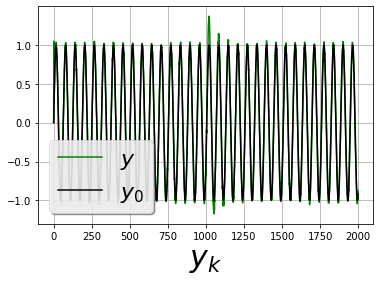

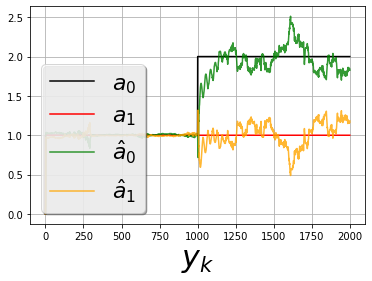

In [41]:
symulacja(N=2000, lamb=0.98, legend_location="lower left")

## 4. Aktualizacja algorytmu
7 różnych wartości $\lambda$
Współczynnik zapominania zmienialiśmy w przedziale od 0.5 do 0.99. Współczynnik zapominaia odpowiada za "przejmowanie" się algorytmu przeszłością wartości parametrów.

### $\lambda=0.5$

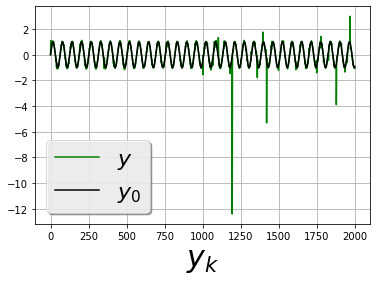

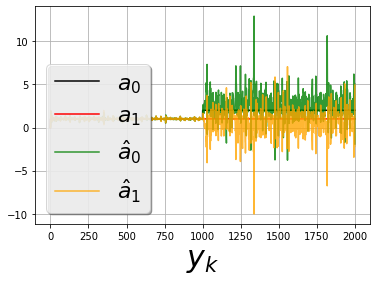

In [31]:
symulacja(N=2000, lamb=0.5, legend_location="lower left")

### $\lambda=0.6$

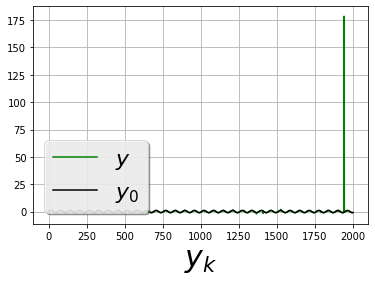

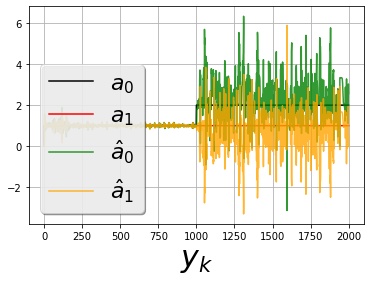

In [32]:
symulacja(N=2000, lamb=0.6, legend_location="lower left")

### $\lambda=0.7$

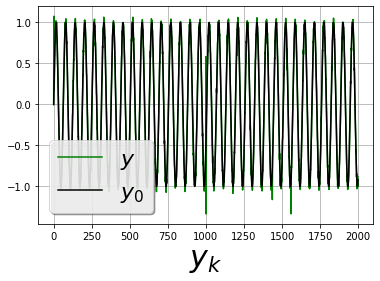

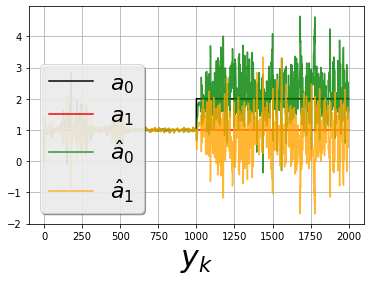

In [34]:
symulacja(N=2000, lamb=0.7, legend_location="lower left")

### $\lambda=0.85$

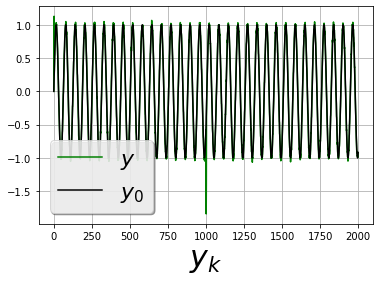

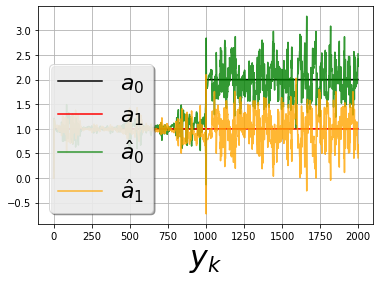

In [35]:
symulacja(N=2000, lamb=0.85, legend_location="lower left")

### $\lambda=0.90$

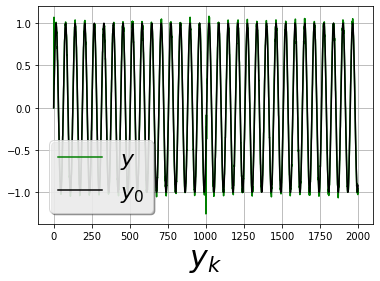

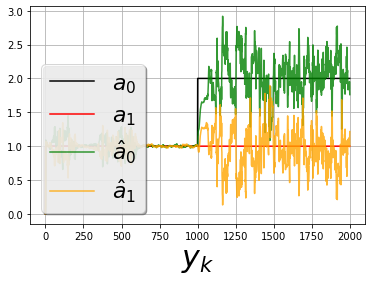

In [37]:
symulacja(N=2000, lamb=0.90, legend_location="lower left")

### $\lambda=0.95$

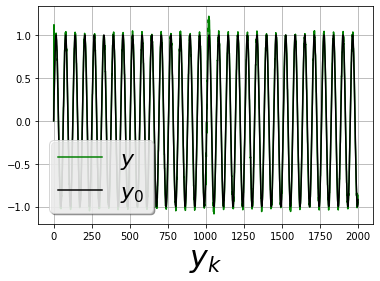

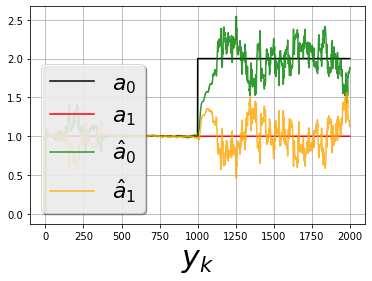

In [38]:
symulacja(N=2000, lamb=0.95, legend_location="lower left")

### $\lambda=0.99$

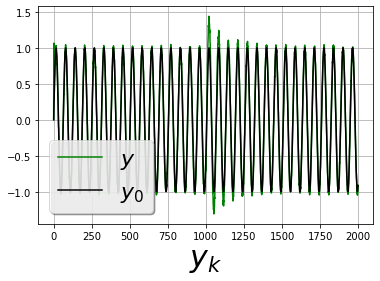

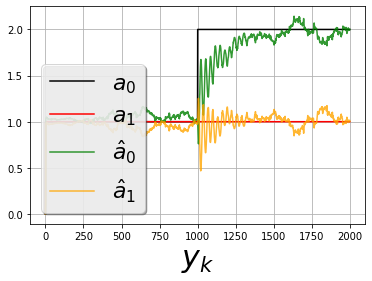

In [44]:
symulacja(N=2000, lamb=0.99, legend_location="lower left")

## Wnioski
Najbardziej do zrozumienia problemu RLS przysłużył się nam punkt 4 tego ćwiczenia, gdzie mogliśmy zauważyć zmianę parametrów estymowanych przez algorytm w zależności od współczynnika zapominania. Zauważyliśmy, że im większy współczynnik tym mniej dynamiczny jest algorytm i wolniej reaguje na zmiany(szczególnie widać to w przypadku gdy $\lambda = 0.99$ ), ale wartości estymowane są dużo bardziej stabilne. Sensowne wartości współczynnika zapominania są w zakresie od 0.95 do 0.99.
